In [1]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

In [2]:
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#imports updated data
df= pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
country_list = df.location.value_counts().keys()
country_list

Index(['Mexico', 'Argentina', 'Thailand', 'Peru', 'Taiwan', 'South Korea',
       'World', 'Japan', 'China', 'North America',
       ...
       'Nauru', 'Tonga', 'Sint Maarten (Dutch part)', 'Kiribati', 'Pitcairn',
       'British Virgin Islands', 'Turkmenistan', 'Cook Islands',
       'Bonaire Sint Eustatius and Saba', 'Tuvalu'],
      dtype='object', length=230)

#Arima Model

In [5]:
#!pip install pmdarima

In [6]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [7]:
  #sorts a new dataframe based off of ISO codes 
  country = "CAN"
  df = df.sort_values('location')
  df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
  df['eid'] = df['eid'].cumsum()
  ndf=df[df.iso_code==country]


  #check dataframe of Canada
  sndf = ndf.sort_values('people_fully_vaccinated')
  val = sndf['people_fully_vaccinated'].values * 100 /list(ndf.population)[0] #creates a ratio of fully vaccinated per 100

In [8]:
ndf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,eid
15221,CAN,North America,Canada,2020-12-15,479064.0,6244.0,6617.286,13793.0,116.0,114.286,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
15222,CAN,North America,Canada,2020-12-16,485576.0,6512.0,6633.429,13911.0,118.0,114.571,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
15224,CAN,North America,Canada,2020-12-18,499282.0,6700.0,6677.000,14180.0,113.0,117.857,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
15223,CAN,North America,Canada,2020-12-17,492582.0,7006.0,6679.143,14067.0,156.0,120.000,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
15225,CAN,North America,Canada,2020-12-19,505741.0,6459.0,6744.857,14284.0,104.0,118.714,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15058,CAN,North America,Canada,2020-07-05,107394.0,209.0,314.429,8823.0,2.0,10.571,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
15059,CAN,North America,Canada,2020-07-06,107815.0,421.0,283.571,8836.0,13.0,9.714,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
15060,CAN,North America,Canada,2020-07-07,108023.0,208.0,275.143,8843.0,7.0,9.000,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38
15061,CAN,North America,Canada,2020-07-08,108334.0,311.0,292.286,8855.0,12.0,9.286,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38


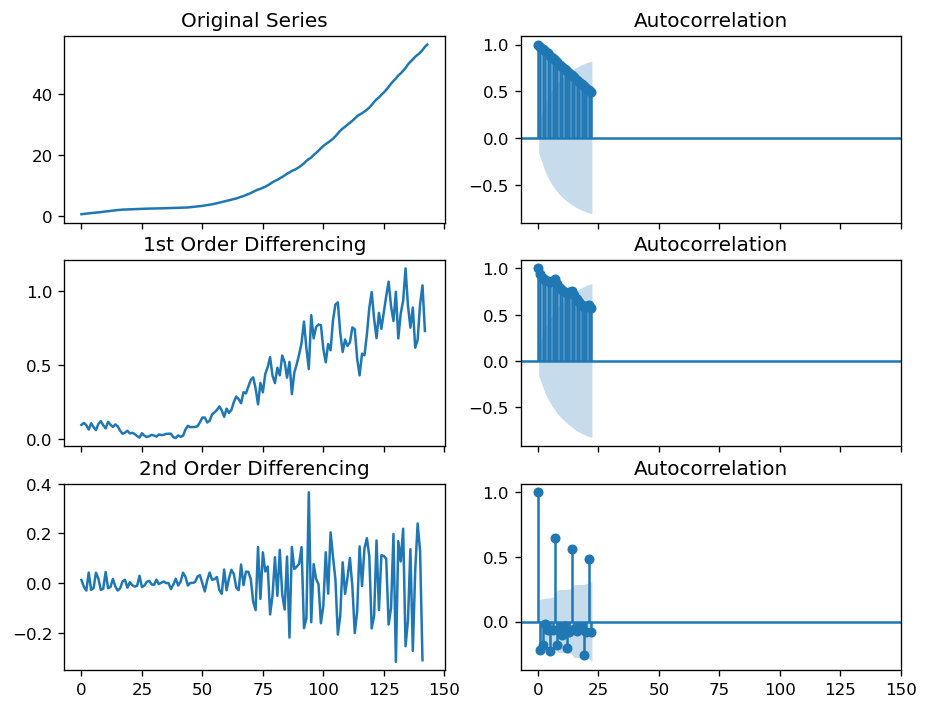

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-259.605, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-232.841, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-238.270, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-248.784, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-234.583, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-259.141, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-258.913, Time=0.25 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-260.688, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-258.931, Time=0.17 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-256.914, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-257.971, Time=0.05 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 1.241 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

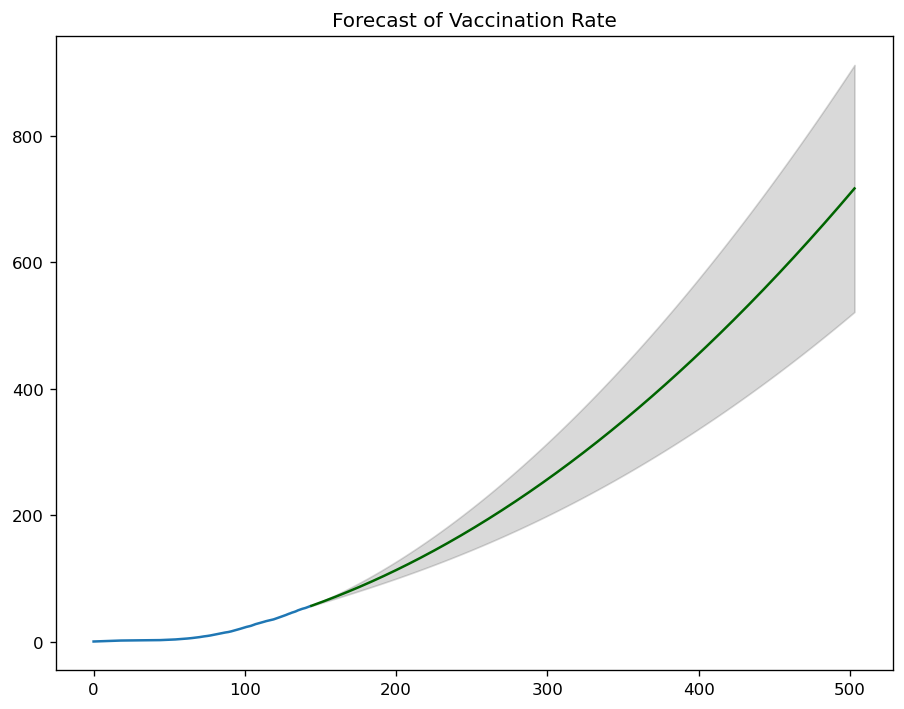

In [9]:
#sorts new dataframe off of country input
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
country_list = ['CAN']
for country in country_list:
  df = df.sort_values('location')
  df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
  df['eid'] = df['eid'].cumsum()
  ndf=df[df.iso_code==country]


  #check dataframe of CAN
  sndf = ndf.sort_values('people_vaccinated')
  val = sndf['people_vaccinated'].values * 100 /list(ndf.population)[0]

  for i in range(len(val)):
    if val[i]>=0:
      pass
    else :
      end = i
      break
  val = val[:end]
  d = list(sndf.date)[:end]
  fig, axes = plt.subplots(3, 2, sharex=True)
  axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
  plot_acf(val, ax=axes[0, 1])

  # 1st Differencing
  axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
  plot_acf(np.diff(val), ax=axes[1, 1])
  diffval = np.diff(val)

  # 2nd Differencing
  axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
  plot_acf(np.diff(diffval), ax=axes[2, 1])
  plt.show()

  model = pm.auto_arima(val, start_p=1, start_q=1,
  test='adf', # use adftest to find optimal 'd'
  max_p=4, max_q=4, # maximum p and q
  m=1, # frequency of series
  d=None, # let model determine 'd'
  seasonal=False, # No Seasonality
  start_P=0,
  D=0,
  trace=True,
  error_action='ignore',
  suppress_warnings=True,
  stepwise=True)
  print(model.summary())
  # model.plot_diagnostics(figsize=(7,5))
  plt.show()
  n_periods = 12*30
  fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
  index_of_fc = np.arange(len(val), len(val)+n_periods)

  # make series for plotting purpose
  fc_series = pd.Series(fc, index=index_of_fc)
  lower_series = pd.Series(confint[:, 0], index=index_of_fc)
  upper_series = pd.Series(confint[:, 1], index=index_of_fc)
  # Plot
  plt.plot(val)
  plt.plot(fc_series, color='darkgreen')
  plt.fill_between(lower_series.index,
  lower_series,
  upper_series,
  color='k', alpha=.15)
  plt.title("Forecast of Vaccination Rate")
  plt.show()
  for i in range(n_periods):
    date = parse(d[-1]) + datetime.timedelta(days=1)
    d.append(str(date).split()[0])
  y = list(val) + list(fc)
  dfp = pd.DataFrame()
  dfp['date'] = d
  dfp['people_fully_vaccinated'] = y
  dfp.to_csv(f'{country}_predictions.csv')

#Creating Lag between vaccinated and fully vaccinated

In [10]:
#checks and ends as to how many days for when a country hits herd immunity(70% fully vaccinated)
for i,x in enumerate(fc):
  if x > 70:
    print(i+1)
    break

16


In [11]:
vaccinated = (sndf.dropna(subset=["people_vaccinated"])["people_vaccinated"]*100/list(ndf.population)[0]).tolist()
fully_vaccinated = (sndf.dropna(subset=["people_vaccinated"])["people_fully_vaccinated"]*100/list(ndf.population)[0]).tolist()

In [12]:
import math

lagMin = 0
mseMin = math.inf
for lag in range(0,139):
  vacNew = vaccinated[:len(vaccinated)-lag]
  fullVacNew = fully_vaccinated[lag:]
  mse = 0
  for i in range(len(vacNew)):
    mse += (vacNew[i] - fullVacNew[i])**2
  mse = mse/len(vacNew)
  if mse < mseMin:
    lagMin = lag
    mseMin = mse
lagMin

78

In [13]:
lag = lagMin
vacNew = vaccinated[:len(vaccinated)-lag]
fullVacNew = fully_vaccinated[lag:]

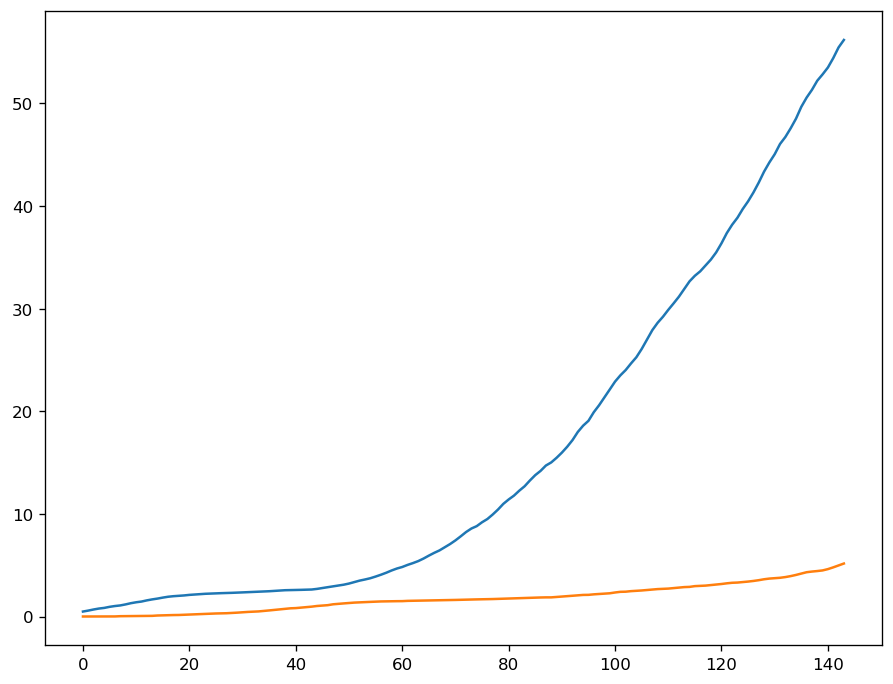

In [14]:
plt.plot(range(len(vaccinated)),vaccinated)
plt.plot(range(len(vaccinated)),fully_vaccinated)

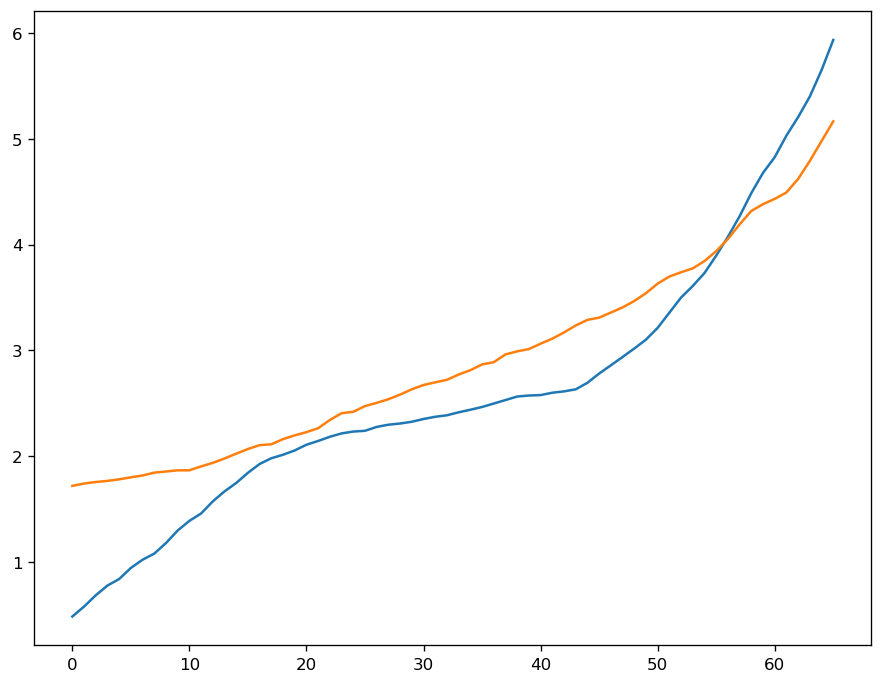

In [15]:
plt.plot(range(len(vacNew)),vacNew)
plt.plot(range(len(fullVacNew)),fullVacNew)

#Filling Missing Vaccination Entries

In [16]:
#filling missing data
country = "AFG"
df = df.sort_values('location')
df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()
ndf2=df[df.iso_code==country]


ndf2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,eid
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
347,AFG,Asia,Afghanistan,2021-02-05,55265.0,34.0,46.571,2407.0,0.0,1.143,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
314,AFG,Asia,Afghanistan,2021-01-03,51526.0,0.0,69.571,2191.0,0.0,4.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
313,AFG,Asia,Afghanistan,2021-01-02,51526.0,0.0,91.429,2191.0,0.0,6.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
312,AFG,Asia,Afghanistan,2021-01-01,51526.0,0.0,102.286,2191.0,0.0,7.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,AFG,Asia,Afghanistan,2020-07-24,35978.0,60.0,108.429,1227.0,14.0,11.143,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
148,AFG,Asia,Afghanistan,2020-07-21,35605.0,112.0,125.000,1188.0,3.0,17.714,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
147,AFG,Asia,Afghanistan,2020-07-20,35493.0,40.0,128.286,1185.0,2.0,20.714,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
146,AFG,Asia,Afghanistan,2020-07-19,35453.0,174.0,144.571,1183.0,17.0,24.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1


In [18]:
df= pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date']).dt.date
df = df.sort_values(['iso_code','date']).reset_index(drop=True)

#calculate relative date (even non -sequential)
days_delta = (df['date'] - df.groupby('iso_code')['date'].shift(1)).dt.days.fillna(1)
df['relative_date'] = 1 + days_delta
df['relative_date'] = df.groupby('iso_code')['relative_date'].cumsum() - 1

#create the same number of relative dates for each country (matching max available)
left = pd.melt(df[['iso_code','relative_date','people_vaccinated']]\
            .pivot(index='iso_code',columns='relative_date',values='people_vaccinated').reset_index(),
            id_vars=['iso_code']).sort_values(['iso_code','relative_date']).reset_index(drop=True)
df = left.drop('value',axis=1).merge(df, on=['iso_code','relative_date'], how='left')
df.tail()

,iso_code,relative_date,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
223555,ZWE,1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223556,ZWE,1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223557,ZWE,1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223558,ZWE,1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223559,ZWE,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ndf2['ts'] = (pd.to_datetime(ndf2['date']) - datetime.datetime(1970,1,1)).dt.total_seconds()
df_nona= ndf2.dropna(subset=['people_vaccinated'])
f2 = interp1d(ndf2['date'], ndf2['people_vaccinated'], kind='cubic')

df_nona.head()